# Tillämpningar och ML-koncept

Grattis! Du har nu byggt ett fullt fungerande Neuralt Nätverk från grunden. Det coola är att matematiken inte bryr sig om vad siffrorna representerar. Pixlar? Pengar? Temperatur? Allt är bara listor med tal.

I denna notebook ska vi:
1. Använda vårt nätverk för att lösa riktiga problem
2. Lära oss om de två stora familjerna av maskininlärning
3. Utforska olika typer av data och problem

In [ ]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from neural_network import NeuralNetwork

---

## Övning 10: "Hello World" för Neurala Nätverk (Siffror)

**Syfte:** Att använda vår `NeuralNetwork`-klass för att lösa ett klassiskt problem: Läsa handskrivna siffror.

In [9]:
scaler = MinMaxScaler()

# 1. Ladda data
digits = pd.read_csv('data/digits.csv')

data = digits.drop(columns=['target']).values
targets = digits['target'].values

# 2. Normalisera (0-16 -> 0.0-1.0)
X = scaler.fit_transform(data)

# 3. One-Hot Encoding
y_onehot = []
for label in targets:
    vector = [0.0] * 10
    vector[label] = 1.0
    y_onehot.append(vector)

# 4. Dela upp i train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

print(f"Träningsdata: {len(X_train)} bilder")
print(f"Testdata: {len(X_test)} bilder")
print(f"Input-storlek: {X.shape[1]} pixlar")
print(f"Output-storlek: 10 klasser (siffrorna 0-9)")

Träningsdata: 1437 bilder
Testdata: 360 bilder
Input-storlek: 64 pixlar
Output-storlek: 10 klasser (siffrorna 0-9)


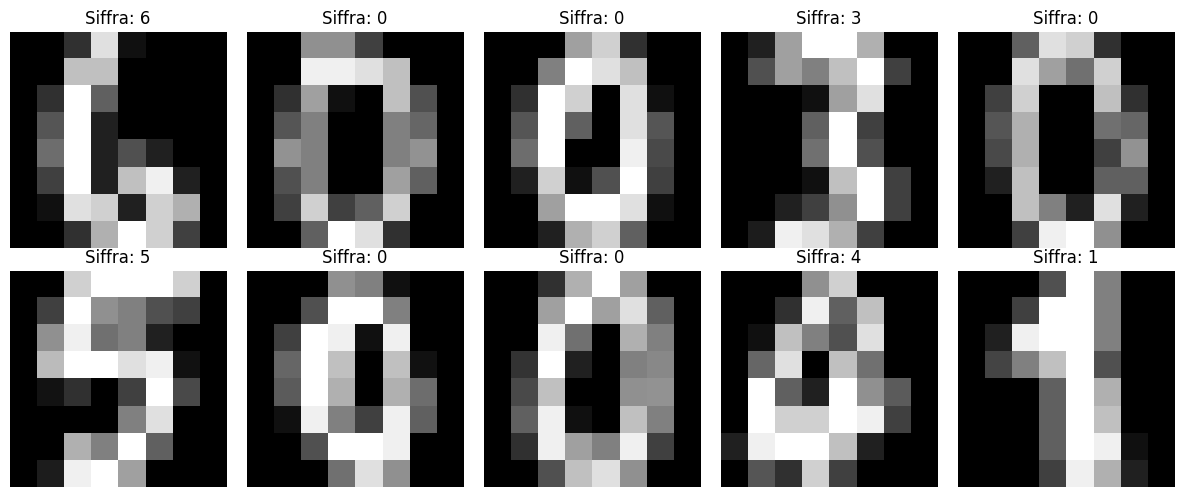

In [10]:
# Visualisera några exempel
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Siffra: {np.argmax(y_train[i])}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 5. Träna nätverket
# Input: 64 (pixlar), Hidden: 16, Output: 10 (siffror)
nn = NeuralNetwork([64, 16, 10])

print("Tränar nätverket på handskrivna siffror...")
# TODO: Träna nätverket på ditt X_train och y_train data


Tränar nätverket på handskrivna siffror...
Epoch 0, MSE: 0.307495
Epoch 49, MSE: 0.007740


In [ ]:
# 6. Utvärdera på testdata
correct = 0
for i in range(len(X_test)):
    prediction = nn.predict(X_test[i].tolist())
    guessed_digit = np.argmax(prediction)
    actual_digit = np.argmax(y_test[i])
    
    if guessed_digit == actual_digit:
        correct += 1

print(f"\nNoggrannhet på testdata: {(correct / len(X_test)) * 100:.1f}%")


Noggrannhet på testdata: 97.2%


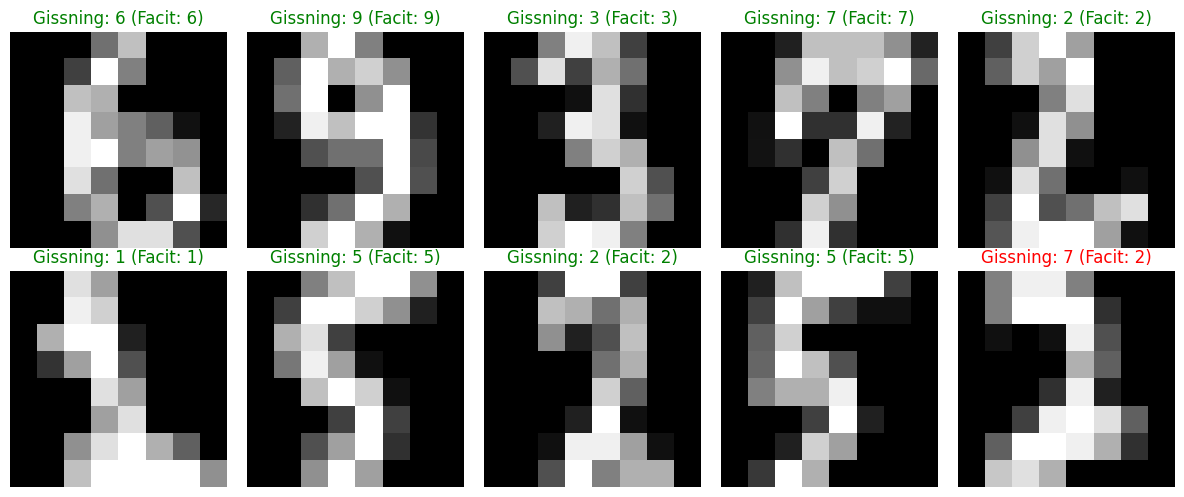

In [13]:
# Visa några prediktioner
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    prediction = nn.predict(X_test[i].tolist())
    guessed = np.argmax(prediction)
    actual = np.argmax(y_test[i])
    
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    color = 'green' if guessed == actual else 'red'
    ax.set_title(f"Gissning: {guessed} (Facit: {actual})", color=color)
    ax.axis('off')
plt.tight_layout()
plt.show()

---

## Övning 11: Nya problem, samma kod

Hittills har vi gjort **Klassificering** (Svart/Vitt, Katt/Hund, Siffra 0-9). Men kan vi använda samma kod för att **förutsäga framtiden**?

### Scenario A: Regression (Förutsäga Huspriser)

Att gissa ett flyttal (t.ex. temperatur eller pris) kallas **Regression**.

Vi har dock ett problem: Vår `Neuron`-klass använder en sigmoid-funktion som alltid ger output mellan 0 och 1. Om vi vill gissa huspriser i hundratusentals dollar, kommer neuronen slå i taket vid 1.0.

**Tricket:** Vi måste **normalisera facit**!
1. Om dyraste huset kostar 500 000 dollar, låtsas vi att det kostar 1.0
2. Vi tränar nätverket
3. När nätverket gissar `0.5`, multiplicerar vi med 500 000 för att få det riktiga priset

In [31]:
# 1. Ladda data (20,000 hus, 8 features per hus)

housing = pd.read_csv('data/california_housing.csv')


X_house = housing.drop(columns=['median_house_value']).values

# Stoppa varje output i en 1-dimensionell lista för att fungera med vårt nätverk
y_house = np.array([[cost] for cost in housing['median_house_value']])

print(f"Exempel data: {X_house[0].tolist()}")
print(f"Exempel pris: ${y_house[0][0]:.0f}")

Exempel data: [-114.31, 34.19, 15.0, 5612.0, 1283.0, 1015.0, 472.0, 1.4936]
Exempel pris: $66900


In [ ]:
# 2. NORMALISERA ALLT
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_house_scaled = scaler_x.fit_transform(X_house)
y_house_scaled = scaler_y.fit_transform(y_house)

# Dela upp i train/test (använd bara en del av datan för snabbhet)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_house_scaled[:2000], y_house_scaled[:2000], test_size=0.2
)

print(f"Träningsdata: {len(X_train_h)} hus")

Träningsdata: 1600 hus


In [ ]:
# 3. Träna nätverket
# 8 inputs (rum, ålder, läge, etc...), 10 dolda neuroner, 1 output (pris)
regressor = NeuralNetwork([8, 10, 1])

print("Tränar bostadsmäklaren...")
# TODO: Träna nätverket på ditt X_train_h och y_train_h data


Tränar bostadsmäklaren...
Epoch 0, MSE: 0.035719
Epoch 99, MSE: 0.014940


In [ ]:
# 4. Testa och översätt tillbaka!
print("\n--- Testar på okända hus ---")
for i in range(5):
    pred_scaled = regressor.predict(X_test_h[i].tolist())

    # Översätt tillbaka till riktiga pengar
    price_guess = scaler_y.inverse_transform(np.array([pred_scaled])).item()
    price_real = scaler_y.inverse_transform(np.array([y_test_h[i]])).item()
    
    print(f"Gissning: ${price_guess:.0f}, Riktigt pris: ${price_real:.0f}")


--- Testar på okända hus ---
Gissning: $297714, Riktigt pris: $240200
Gissning: $105807, Riktigt pris: $116300
Gissning: $171796, Riktigt pris: $132600
Gissning: $116432, Riktigt pris: $147700
Gissning: $169118, Riktigt pris: $103000


### Scenario B: Vin (Multi-class)

Låt oss återvända till klassificering men göra det lite svårare. Datasetet **Wine** innehåller kemisk analys av tre olika vinsorter.

In [ ]:
# 1. Ladda data
wine =  pd.read_csv('data/wine.csv')

X_wine = wine.drop(columns=['target']).values
y_wine = wine['target'].values

# 2. Normalisera Inputs
scaler = MinMaxScaler()
X_wine = scaler.fit_transform(X_wine)

# 3. One-Hot Encode Targets
y_wine_onehot = pd.get_dummies(y_wine, dtype=int).values.tolist()

# TODO: Dela upp i train/test med 30% testdata med sklearns train_test_split
X_train_w, X_test_w, y_train_w, y_test_w = [] # TODO

print(f"Features: {X_wine.shape[1]} (alkoholhalt, syra, färg, etc)")
print(f"Klasser: 3 vinsorter")

Features: 13 (alkoholhalt, syra, färg, etc)
Klasser: 3 vinsorter


In [ ]:
# 4. Träna Sommelieren
sommelier = NeuralNetwork([13, 8, 3])

print("Tränar Sommelieren...")
# TODO: Träna nätverket på ditt X_train_w och y_train_w data


Tränar Sommelieren...
Epoch 0, MSE: 0.611909
Epoch 99, MSE: 0.016847


In [40]:
# 5. Utvärdera
correct = 0
for i in range(len(X_test_w)):
    probs = sommelier.predict(X_test_w[i].tolist())
    guess = np.argmax(probs)
    actual = np.argmax(y_test_w[i])
    
    if guess == actual:
        correct += 1

print(f"Sommelieren hade rätt på {correct} av {len(X_test_w)} viner.")
print(f"Accuracy: {(correct / len(X_test_w)) * 100:.1f}%")

Sommelieren hade rätt på 53 av 54 viner.
Accuracy: 98.1%


---

## Övning 12: Kan ditt nätverk läsa?

För att mata in text i vårt nätverk använder vi en klassisk teknik som heter **Bag of Words**. Tänk dig att vi tar en mening, klipper ut alla ord, och lägger dem i en påse. Vi bryr oss inte om _ordningen_, bara _vilka_ ord som finns med.

In [44]:
# 1. Vårt lilla dataset
sentences = [
    "jag älskar detta",
    "detta är fantastiskt",
    "vilken underbar dag",
    "maten var god",
    "jag hatar detta",
    "detta är hemskt",
    "vilken hemsk dag",
    "maten var äcklig"
]

# Facit: 1 = Positivt, 0 = Negativt
targets = [
    [1], [1], [1], [1],  # De 4 första är positiva
    [0], [0], [0], [0]   # De 4 sista är negativa
]

# 2. Bygg Ordboken (Vocabulary)
vocabulary = []
for s in sentences:
    for word in s.split():
        if word not in vocabulary:
            vocabulary.append(word)
            
print(f"Nätverket kan {len(vocabulary)} ord: {vocabulary}")

Nätverket kan 15 ord: ['jag', 'älskar', 'detta', 'är', 'fantastiskt', 'vilken', 'underbar', 'dag', 'maten', 'var', 'god', 'hatar', 'hemskt', 'hemsk', 'äcklig']


In [45]:
# 3. Hjälpfunktion: Text till Siffror
def text_to_vector(text):
    vector = [0] * len(vocabulary)
    words = text.split()
    for word in words:
        if word in vocabulary:
            index = vocabulary.index(word)
            vector[index] = 1
    return vector

# Testa funktionen
print(f"Test: 'jag hatar' -> {text_to_vector('jag hatar')}")

Test: 'jag hatar' -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
# 4. Förbered träningsdatan
X_text = [text_to_vector(s) for s in sentences]
y_text = targets

# 5. Träna Nätverket
text_nn = NeuralNetwork([len(vocabulary), 4, 1])

print("Lär nätverket svenska...")
# TODO: Träna nätverket på ditt X_text och y_text data


Lär nätverket svenska...
Epoch 0, MSE: 0.263683
Epoch 999, MSE: 0.004205


In [47]:
# 6. Testa på NYA meningar
print("\n--- Testar nätverkets språkkänsla ---")

test_sentences = [
    "jag älskar maten",      # En mix av ord den sett i positiva sammanhang
    "detta är äckligt",      # En mix av ord den sett i negativa sammanhang
    "jag hatar maten",       # Ny kombination
    "fantastiskt underbar",  # Två positiva ord
]

for s in test_sentences:
    vec = text_to_vector(s)
    prediction = text_nn.predict(vec)[0]
    
    sentiment = "POSITIV :)" if prediction > 0.5 else "NEGATIV :("
    print(f"Mening: '{s}' -> Gissning: {prediction:.2f} -> {sentiment}")


--- Testar nätverkets språkkänsla ---
Mening: 'jag älskar maten' -> Gissning: 0.86 -> POSITIV :)
Mening: 'detta är äckligt' -> Gissning: 0.61 -> POSITIV :)
Mening: 'jag hatar maten' -> Gissning: 0.04 -> NEGATIV :(
Mening: 'fantastiskt underbar' -> Gissning: 0.98 -> POSITIV :)


### Analys: Vad hände precis?

Om du kör koden kommer du se att nätverket troligen gissar rätt på "jag älskar maten", trots att den meningen **aldrig fanns i träningsdatan**!

Hur?
1. Nätverket lärde sig att ordet "älskar" har en stark koppling till positiv output (1)
2. Det lärde sig att "maten" är neutralt (finns i både bra och dåliga meningar)
3. När du kombinerar dem väger "älskar" tyngre, och summan blir positiv

Du har precis byggt en AI som förstår (vissa) ords innebörd baserat på erfarenhet!

### Begränsningen (Varför detta inte är ChatGPT)

Ditt nätverk använder "Bag of Words". Det betyder att den tappar bort **ordföljden**. För ditt nätverk betyder följande två meningar exakt samma sak:

1. *"Mat var inte bra, den var dålig"*
2. *"Mat var inte dålig, den var bra"*

För att förstå skillnaden behöver man nätverk som har **minne** och läser ord i sekvens (som Transformers/GPT).

---

## Övning 13: Spionkameran (Autoencoder & Denoising)

Hittills har vi matat in en bild och fått ut en etikett. Men vad händer om **input är en bild** och **output också är en bild**?

Detta kallas för en **Autoencoder**. Det används för att:
- Restaurera gamla foton
- Ta bort brus
- Komprimera data

**Uppdraget:** Dina spionsatelliter skickar ner bilder på siffror, men atmosfären lägger till massa "brus". Vi ska träna nätverket att ta bort bruset!

In [48]:
# 1. Ladda data

digits = pd.read_csv('data/digits.csv')
data = digits.drop(columns=['target']).values
X_clean = scaler.fit_transform(data)

# 2. Skapa "trasig" data (Lägg till brus)
noise_factor = 0.5
X_noisy = X_clean + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_clean.shape)
X_noisy = np.clip(X_noisy, 0., 1.)  # Klipp till 0-1

# Dela upp: X_noisy är INPUT, X_clean är FACIT
X_train_noisy, X_test_noisy, X_train_clean, X_test_clean = train_test_split(
    X_noisy, X_clean, test_size=0.2, random_state=42
)

print(f"Träningsdata: {len(X_train_noisy)} bilder")

Träningsdata: 1437 bilder


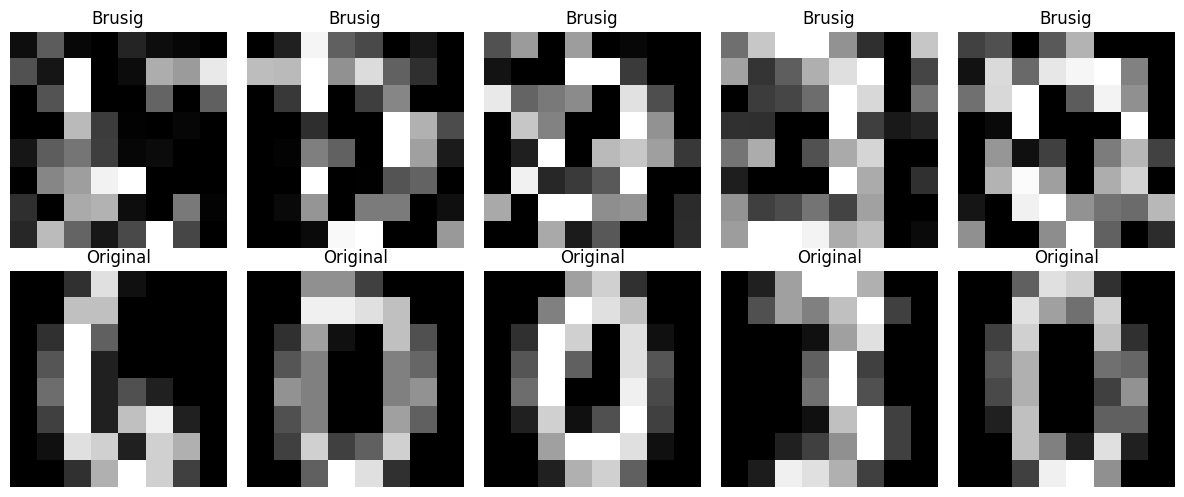

In [49]:
# Visualisera brusiga vs rena bilder
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(5):
    axes[0, i].imshow(X_train_noisy[i].reshape(8, 8), cmap='gray')
    axes[0, i].set_title('Brusig')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(X_train_clean[i].reshape(8, 8), cmap='gray')
    axes[1, i].set_title('Original')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Bygg Autoencodern
# Input: 64 pixlar
# Hidden: 32 neuroner (Vi tvingar nätverket att komprimera!)
# Output: 64 pixlar
autoencoder = NeuralNetwork([64, 32, 64])

print("Tränar på att ta bort brus...")
# Notera: Vi tränar med NOISY som input och CLEAN som target!
autoencoder.train(X_train_noisy[:500].tolist(), X_train_clean[:500].tolist(), epochs=50, learning_rate=0.1)

Tränar på att ta bort brus...
Epoch 0, MSE: 4.797478
Epoch 49, MSE: 1.814169


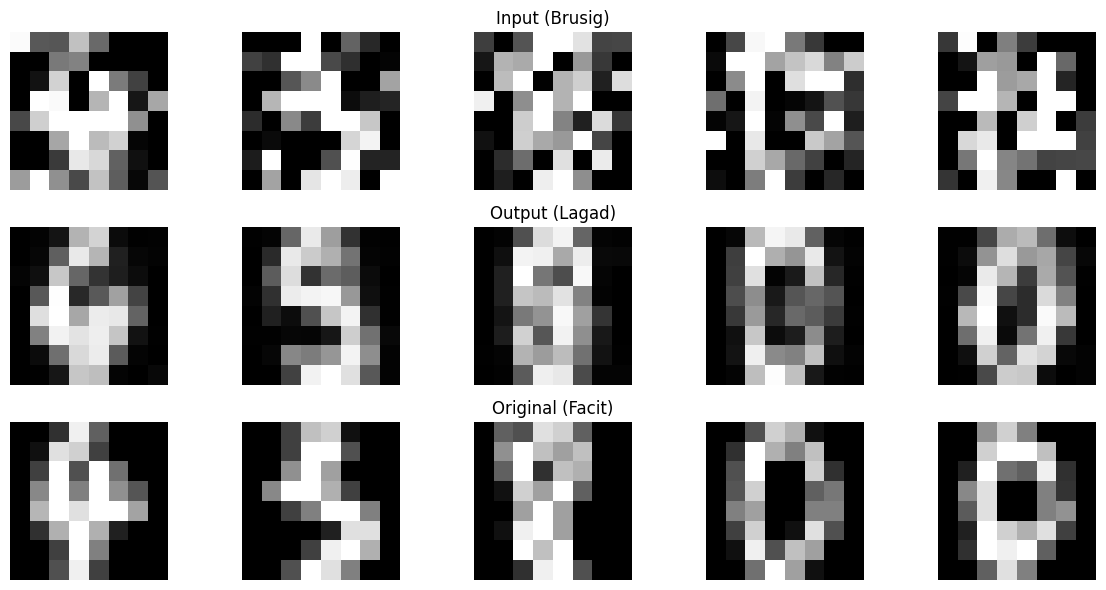

In [51]:
# 4. Visualisera Resultatet
idxs = np.random.randint(0, len(X_test_noisy), 5)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(idxs):
    # A. Den trasiga bilden (Input)
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(X_test_noisy[idx].reshape(8, 8), cmap='gray')
    ax.axis('off')
    if i == 2: ax.set_title('Input (Brusig)')

    # B. Nätverkets lagning (Output)
    reconstructed = np.array(autoencoder.predict(X_test_noisy[idx].tolist()))
    ax = plt.subplot(3, 5, i + 1 + 5)
    plt.imshow(reconstructed.reshape(8, 8), cmap='gray')
    ax.axis('off')
    if i == 2: ax.set_title('Output (Lagad)')

    # C. Facit (Originalet)
    ax = plt.subplot(3, 5, i + 1 + 10)
    plt.imshow(X_test_clean[idx].reshape(8, 8), cmap='gray')
    ax.axis('off')
    if i == 2: ax.set_title('Original (Facit)')

plt.tight_layout()
plt.show()

---

## Övning 14: Sinus

Det finns en matematisk sats som heter **"Universal Approximation Theorem"**. Den säger att ett neuralt nätverk med minst ett dolt lager kan lära sig **vilken matematisk funktion som helst**.

Låt oss bevisa det genom att lära nätverket en **Sinuskurva**.

In [ ]:
# 1. Skapa Data: En Sinusvåg
X_sin = np.linspace(0, 2 * np.pi, 30).reshape(-1, 1)
y_sin = np.sin(X_sin)

# 2. Normalisera för Sigmoid
# Sinus går från -1 till 1. Vi flyttar det till 0 till 1.
y_sin_shifted = (y_sin + 1) / 2
X_sin_normalized = X_sin / (2 * np.pi)

# Gör om till listor
X_sin_list = X_sin_normalized.tolist()
y_sin_list = y_sin_shifted.tolist()

In [ ]:
# 3. Bygg Nätverket
# 1 Input (x-värdet)
# 10 Dolda neuroner
# 1 Output (y-värdet)
math_network = NeuralNetwork([1, 10, 1])

print("Lär nätverket att rita vågor...")
math_network.train(X_sin_list, y_sin_list, epochs=2000, learning_rate=0.1)

In [ ]:
# 4. Förutsäg och Rita
predictions = []
for val in X_sin_normalized:
    pred = math_network.predict(val.tolist())
    predictions.append(pred[0])

predictions = np.array(predictions)

# Plotta
plt.figure(figsize=(10, 6))
plt.scatter(X_sin, y_sin_shifted, label='Facit (Sinus)', color='gray', s=30)
plt.plot(X_sin, predictions, label='Nätverkets gissning', color='red', linewidth=3)
plt.title('Neuralt Nätverk lär sig Sinus-funktionen')
plt.xlabel('x')
plt.ylabel('y (normaliserad)')
plt.legend()
plt.grid(True)
plt.show()

---

## De Två Stora Familjerna av ML

Klassisk maskininlärning delas oftast in i två huvudkategorier, baserat på vilken typ av data man har och vad man vill uppnå.

### Supervised Learning (Övervakad Inlärning)

Detta är den vanligaste formen av maskininlärning och den vi har arbetat med hittills. "Övervakad" betyder att vi tränar modellen på ett dataset där vi redan känner till de korrekta svaren. Vi har en "facitlista".

Målet är att modellen ska lära sig den underliggande funktionen som kopplar ihop en input med en korrekt output.

**Två huvudtyper:**

1. **Klassificering:** Förutsäga en kategorisk etikett
   - *Exempel:* Spam-filtrering, bildigenkänning, pingvinarter

2. **Regression:** Förutsäga ett kontinuerligt värde
   - *Exempel:* Huspriser, försäljningsprognoser, temperatur

![Supervised learning](./images/classification.jpeg)

### Unsupervised Learning (Oövervakad Inlärning)

Här har vi den motsatta situationen. Vi har ett dataset, men vi har ingen aning om vad de "korrekta" svaren är. Målet är att låta modellen på egen hand hitta dolda mönster och strukturer i datan.

**Två vanliga uppgifter:**

1. **Clustering (Klustring):** Hitta naturliga grupperingar
   - *Exempel:* Kundsegmentering, anomalidetektering

2. **Dimensionality Reduction:** Komprimera data smart
   - *Exempel:* PCA för att visualisera högdimensionell data

![Unsupervised learning](./images/clustering.jpeg)

### PCA (Principal Component Analysis)

Om du tävlar i AI (t.ex. IOAI) kommer du ständigt stöta på data med _för många_ kolumner. Det klassiska verktyget för att hantera detta är **PCA**.

Tänk dig ett moln av punkter format som en utdragen baguette i 3D-rymden:

1. **PCA hittar "Huvudriktningen":** Den drar en linje genom baguettens längd (där datan varierar mest). Detta är "Principal Component 1".
2. **PCA hittar nästa riktning:** Den drar en ny linje vinkelrätt mot den första, genom baguettens bredd.
3. **Platta till:** Genom att bara behålla dessa två linjer och kasta bort höjden (som kanske bara är brus), har vi komprimerat 3D-objektet till en 2D-skiva.

**Användningsområden:**
- Visualisera komplex data i 2D
- Ta bort brus (behåll bara de viktigaste komponenterna)
- Skapa nya features som är bättre för din modell

---

## Svenska exempel

Under 2000-talet, när datorkraften och mängden tillgänglig data exploderade, blev maskininlärning ryggraden i många av de mest framgångsrika tech-bolagen.

### Klarna
Hela Klarnas affärsmodell bygger på att snabbt kunna fatta ett kreditbeslut. När du klickar på "Köp nu, betala senare" måste de på en bråkdels sekund avgöra hur troligt det är att du faktiskt kommer att betala. Detta görs med en **regressionsmodell** som tar hundratals variabler (din köphistorik, tid på dygnet, typ av produkt, etc.) och producerar en "riskpoäng".

### Spotify
Hur kan Spotify upplevas som att den "känner" din musiksmak? Deras rekommendationsmotorer kombinerar flera ML-tekniker:

- **Kollaborativ filtrering (Unsupervised):** Systemet använder clustering för att hitta andra användare vars musiksmak liknar din. Den tittar sedan på vad de lyssnar på som du inte har upptäckt.
- **Content-Based Filtering (Supervised):** Spotify analyserar ljudfilerna direkt för att extrahera hundratals musikaliska egenskaper (tempo, "dansbarhet", tonart etc.). Din "smakprofil" matchas mot nya låtar med liknande egenskaper.

---

## Perspektiv på Klassisk Maskininlärning

### Det filosofiska perspektivet: Empirismens Återkomst
Maskininlärning representerar en seger för **empirismen**. AI-forskare slutade försöka förprogrammera "sanningen". Istället skapade de system som kunde lära sig från erfarenhet (data). En ML-modell är en modern "Tabula Rasa", en oskriven tavla som fylls med kunskap genom observation av världen.

### Det ekonomiska perspektivet
ML skapade ett enormt ekonomiskt värde. Amazons rekommendationsmotor sägs stå för över en tredjedel av deras totala försäljning. ML var inte längre en akademisk leksak; det var en affärskritisk motor.

### Det sociologiska perspektivet: Filterbubblor
När företag som YouTube och Facebook började använda ML för att personalisera sina flöden, uppstod **filterbubblor**. Algoritmerna har inget ont uppsåt - deras enda mål är att maximera din tid på plattformen. Men genom att optimera för engagemang, gynnar de oavsiktligt innehåll som är chockerande eller extremt.

### Det kognitiva perspektivet: Uppmärksamhetsekonomin
Sociala medier använder **intermittent förstärkning** - samma princip som gör spelautomater beroendeframkallande. Du vet aldrig _när_ nästa belöning kommer, vilket får dig att fortsätta skrolla.

---

## Vad har vi lärt oss?

I denna notebook har vi:

1. Använt vårt nätverk för att läsa **handskrivna siffror** (94%+ noggrannhet!)
2. Löst **regression** (huspriser) och **multi-class klassificering** (vin)
3. Byggt en enkel **textanalys** med Bag of Words
4. Skapat en **Autoencoder** för att ta bort brus från bilder
5. Bevisat **Universal Approximation Theorem** genom att lära en sinuskurva
6. Lärt oss skillnaden mellan **Supervised** och **Unsupervised Learning**
7. Diskuterat **perspektiv** på ML: filosofiskt, ekonomiskt, sociologiskt

## Nästa steg

Du har nu byggt grunden. Men för att bygga professionella nätverk behöver du:
- Optimerare som **Adam**
- Aktiveringsfunktioner som **ReLU**
- Tekniker som **Dropout**
- Ramverk som **Keras/PyTorch**

Men grundprincipen är densamma: vikter, bias, framåtpass, bakåtpass. Det du lärt dig här är fundamentet som alla avancerade tekniker bygger på.

**Grattis - du har byggt ett neuralt nätverk från grunden!**